# **1. Load Packages**

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pdp
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# This command was used only at the beginning for installing the right package
!pip install pandas-profiling==2.8.0

# **2. Load Data**

In [0]:
data_df = pd.read_csv("/content/drive/My Drive/datasets/facial-expression/fer2013/fer2013-original.csv", sep=",")

# **3. Glimpse the data**

In [0]:
print(f"data shape: rows: {data_df.shape[0]}, cols: {data_df.shape[1]}")
print(f"data columns: {list(data_df.columns)}")

data shape: rows: 35887, cols: 3
data columns: ['emotion', 'pixels', 'Usage']


In [0]:
data_df.describe()

emotion
count  35887.000000
mean       3.323265
std        1.873819
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000

In [0]:
def missing_data_and_data_types(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data_and_data_types(data_df)

emotion  pixels   Usage
Total         0       0       0
Percent       0       0       0
Types     int64  object  object

In [0]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(data_df)

emotion  pixels  Usage
Total      35887   35887  35887
Uniques        7   34034      3

# **4. Data profiling**

**4.1. Data profiling on the whole dataset**

In [0]:
pdp.ProfileReport(data_df)

**4.2. Data profiling on training set**

In [0]:
pdp.ProfileReport(data_df[data_df['Usage']=='Training'])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**4.3. Data profiling on validation set**

In [0]:
pdp.ProfileReport(data_df[data_df['Usage']=='PublicTest'])

**4.4. Data profiling on test set**

In [0]:
pdp.ProfileReport(data_df[data_df['Usage']=='PrivateTest'])

# **5. Emotion Distribution**

0 = Angry
1 = Disgust
2 = Fear
3 = Happy
4 = Sad
5 = Surprise
6 = Neutral


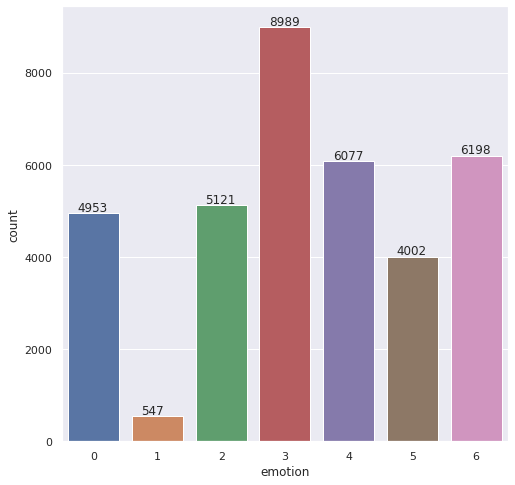

In [5]:
# Get the distribution of the data before augmentation
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
ax = sns.countplot(data_df['emotion'], label='Count')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))
plt.title('Overall Distribution')
plt.show()
print('0 = Angry\n1 = Disgust\n2 = Fear\n3 = Happy\n4 = Sad\n5 = Surprise\n6 = Neutral')

0 = Angry
1 = Disgust
2 = Fear
3 = Happy
4 = Sad
5 = Surprise
6 = Neutral


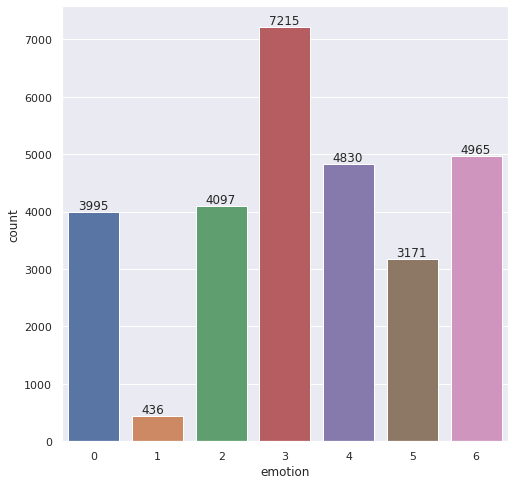

In [6]:
# Get the distribution of the data before augmentation
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
ax = sns.countplot(data_df['emotion'][data_df['Usage'] == 'Training'], label='Count')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))
plt.title('Training Distribution')
plt.show()
print('0 = Angry\n1 = Disgust\n2 = Fear\n3 = Happy\n4 = Sad\n5 = Surprise\n6 = Neutral')

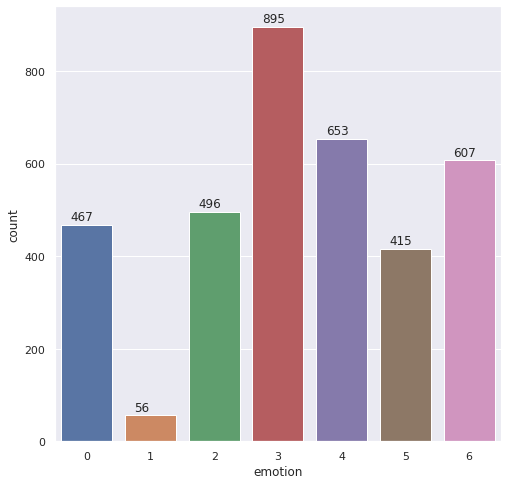

In [7]:
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
ax = sns.countplot(data_df['emotion'][data_df['Usage'] == 'PublicTest'], label='Count')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.title('Validation Distribution')
plt.show()

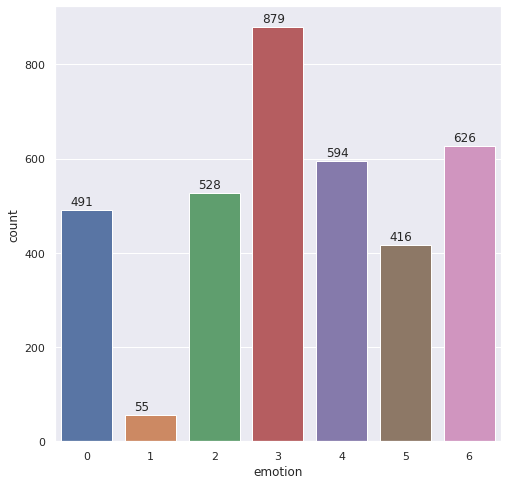

In [8]:
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
ax = sns.countplot(data_df['emotion'][data_df['Usage'] == 'PrivateTest'], label='Count')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
# plt.title('Test Distribution')
# plt.show()
plt.savefig('/content/test.png', dpi = 500)